In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
df=pd.read_csv("Crop_Recommendation.csv")

In [72]:
df.head()

,N,P,K,Temperature,Humidity,ph,Rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
df.isnull().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
ph             0
Rainfall       0
label          0
dtype: int64

In [74]:
df.describe()

,N,P,K,Temperature,Humidity,ph,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [76]:
df.shape

(2200, 8)

In [77]:
unique_values = df['label'].unique()
print(unique_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [78]:
df.duplicated().sum()

0

In [79]:
X=df.drop(columns=['label'])
Y=df['label']

<Axes: >

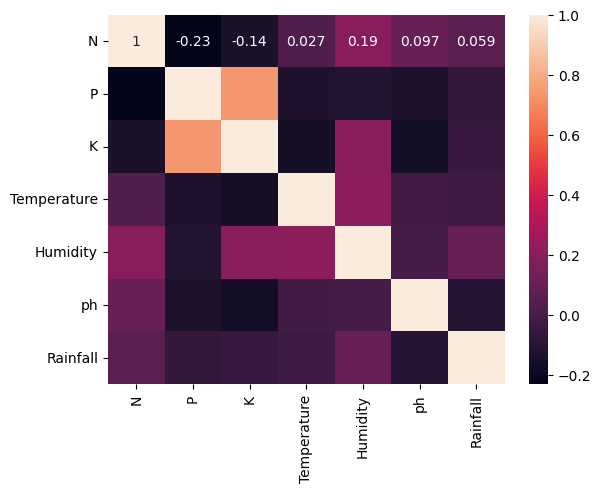

In [80]:
sns.heatmap(X.corr(),annot=True)

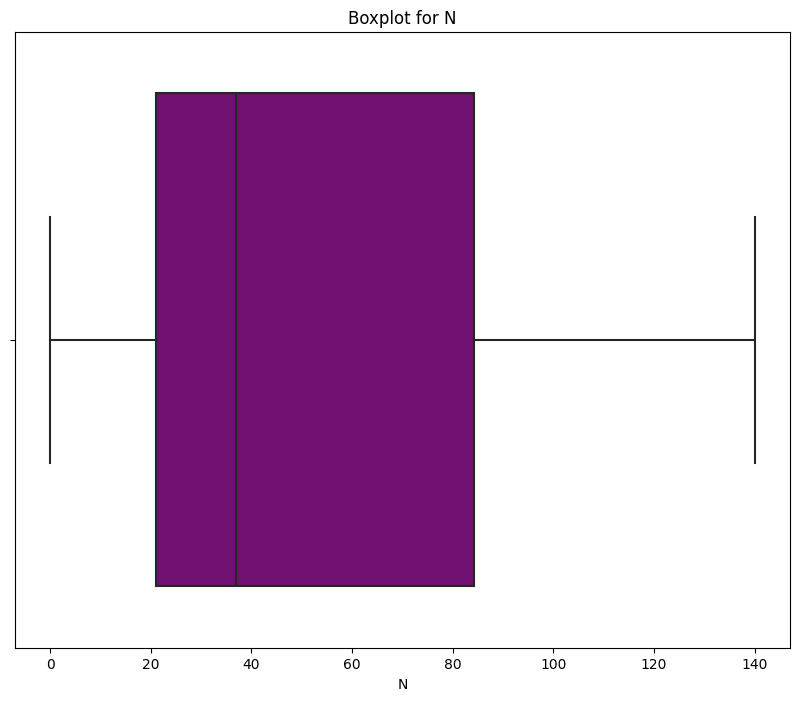

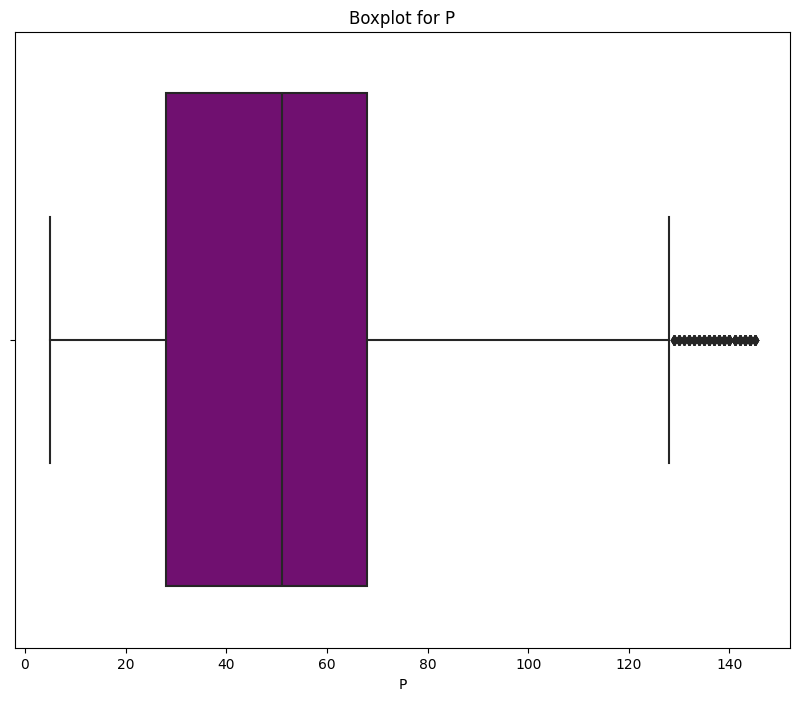

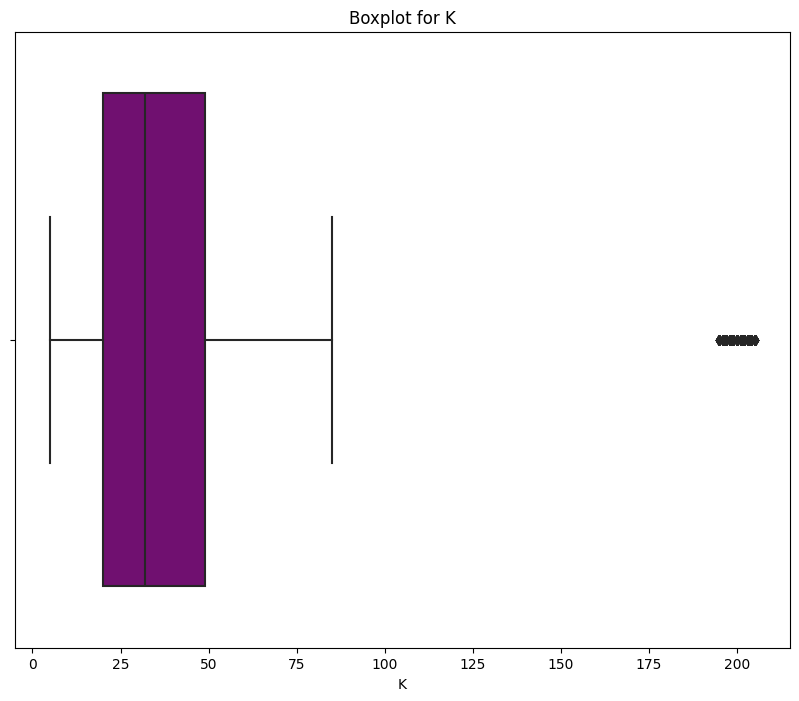

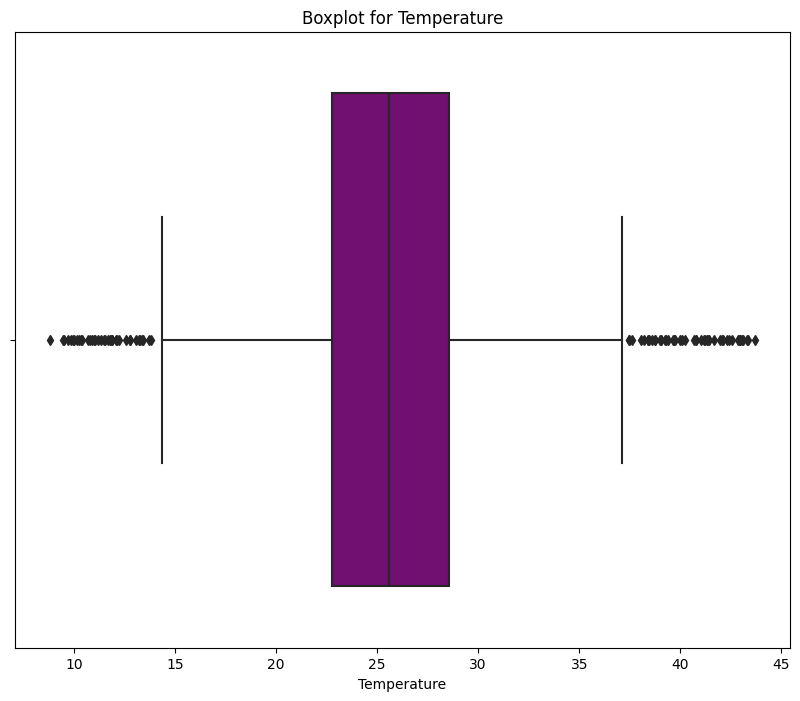

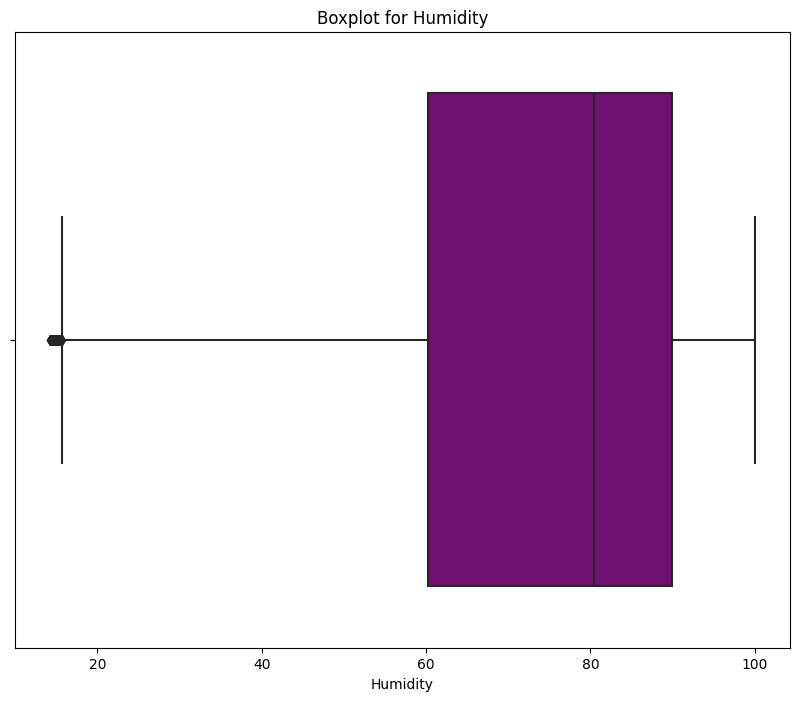

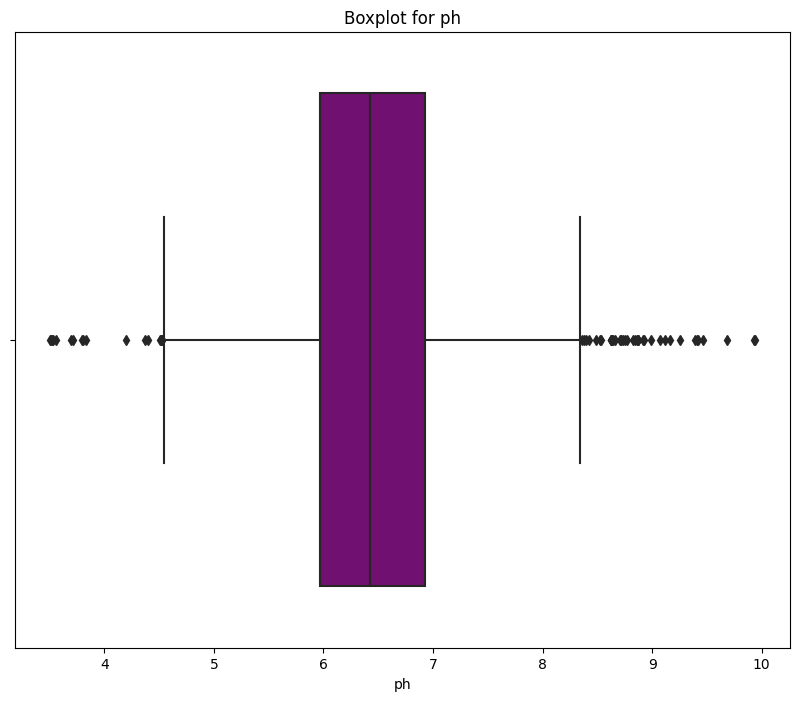

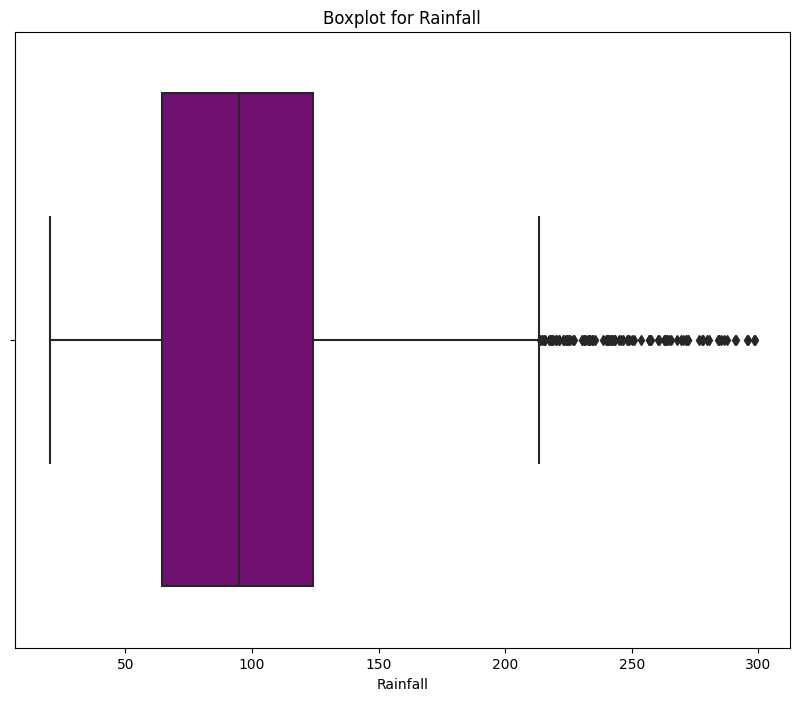

In [81]:
for i in X.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=i, data=X, color="purple")
    plt.title(f"Boxplot for {i}")
    plt.xlabel(i)
    plt.show()

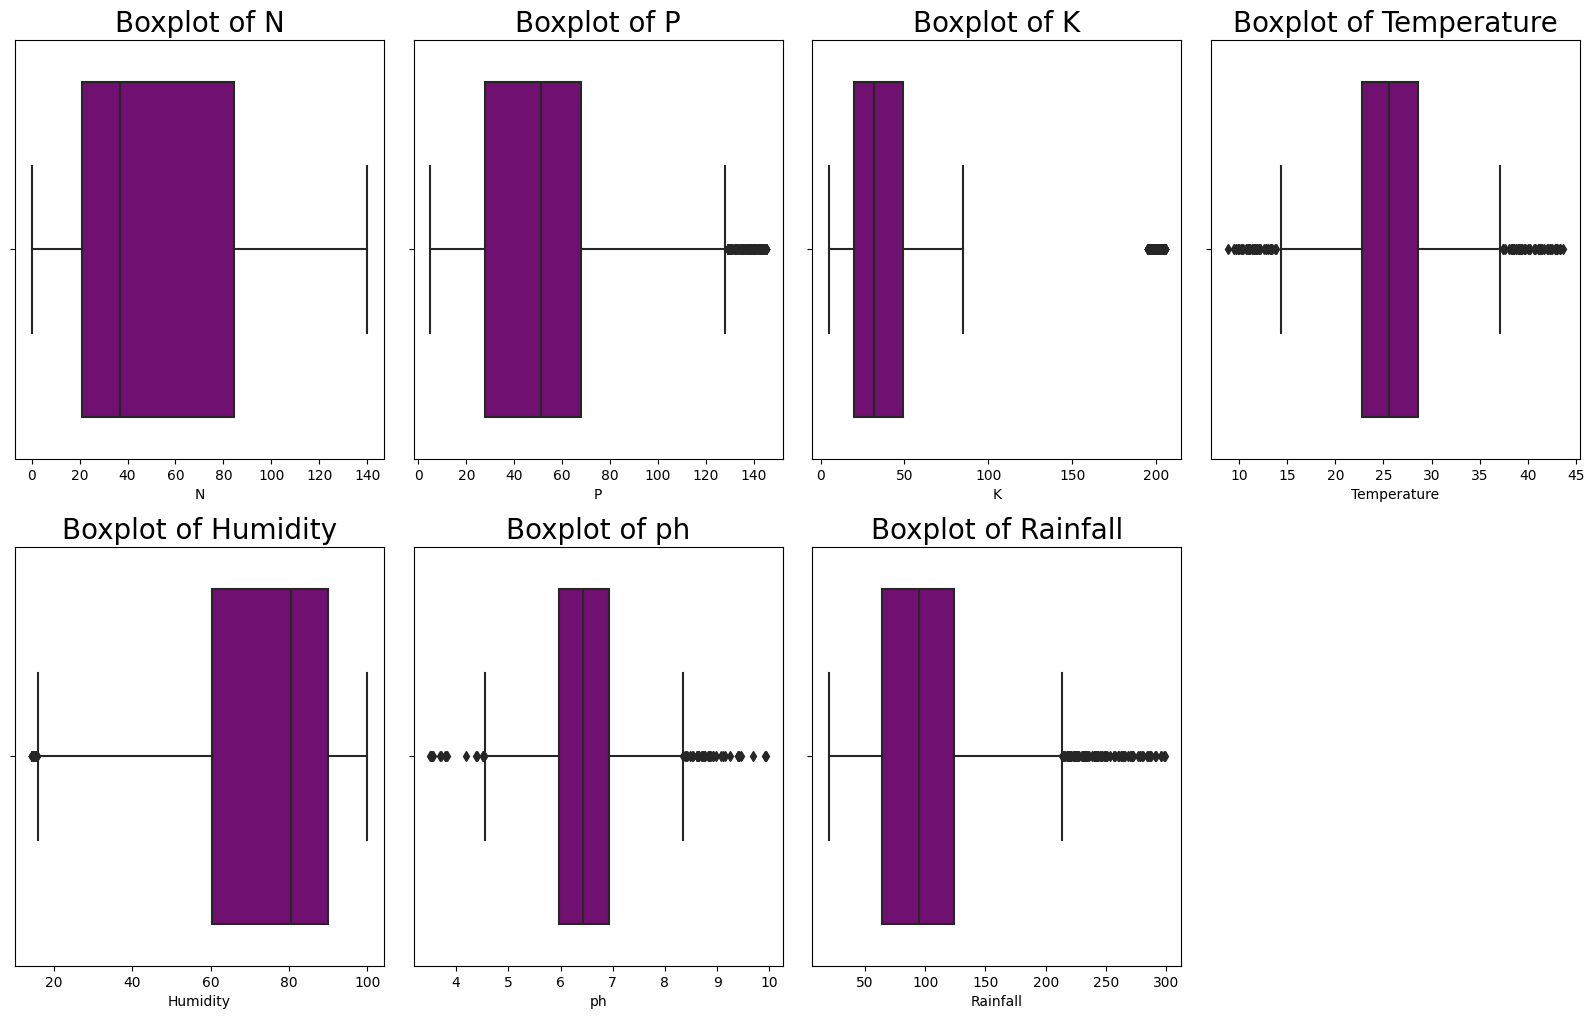

In [82]:
c = 'purple'
plt.figure(figsize=(16, 20))
plots = 1

for i in X.columns:
    plt.subplot(4, 4, plots)
    sns.boxplot(x=i, data=X, color=c)
    plt.title(f"Boxplot of {i}", fontsize=20)
    plots += 1

plt.tight_layout()
plt.show()

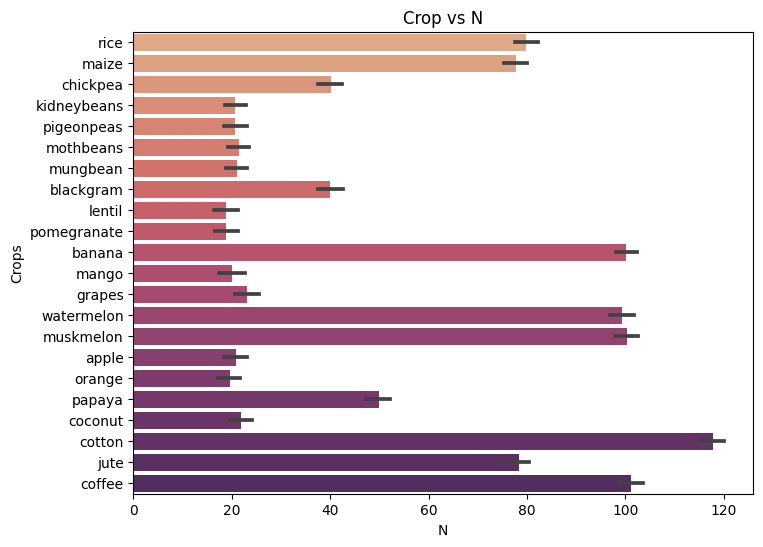

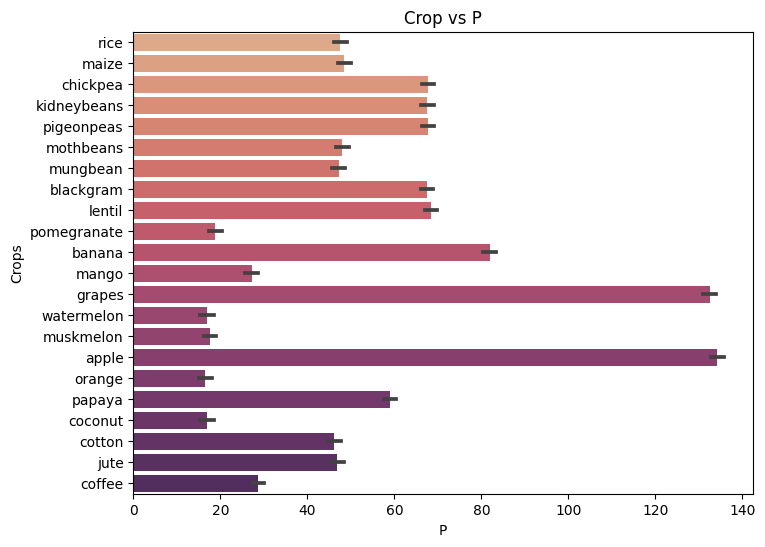

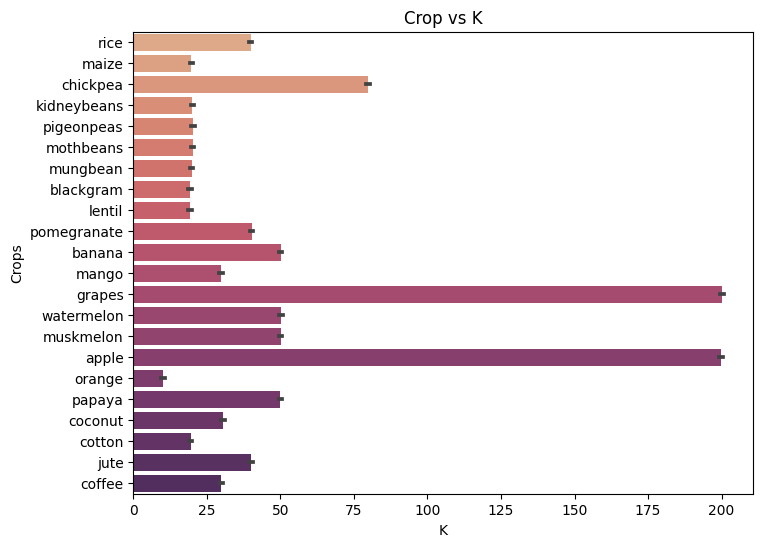

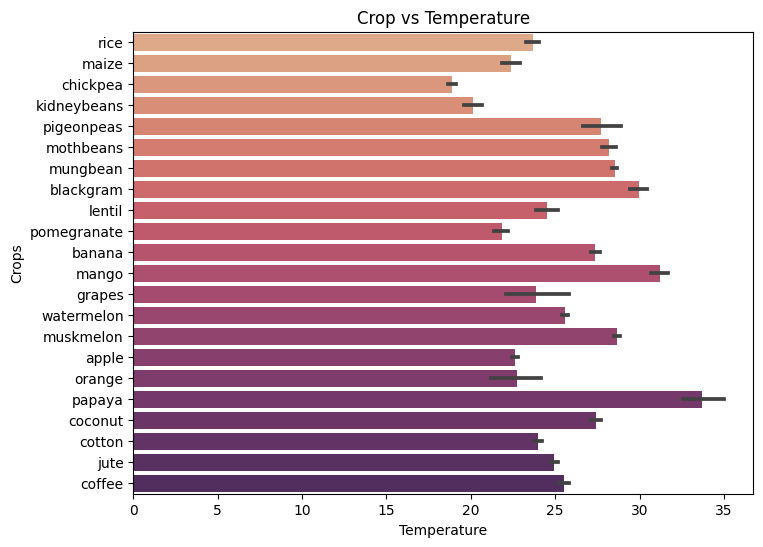

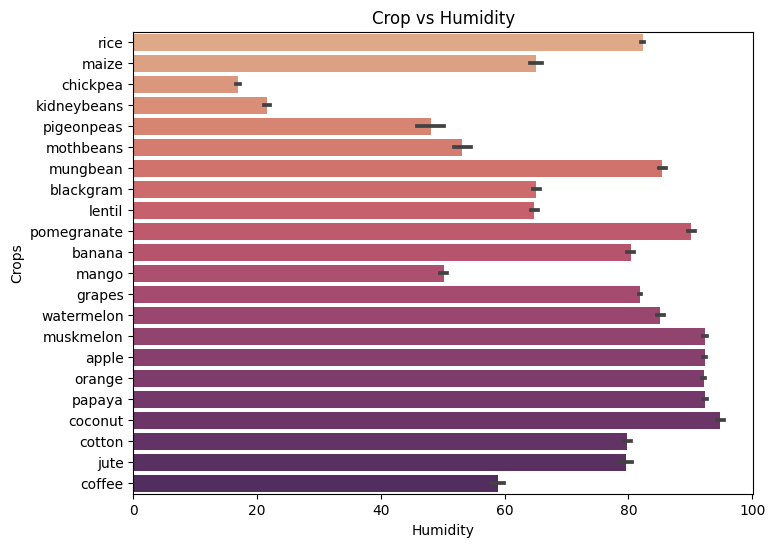

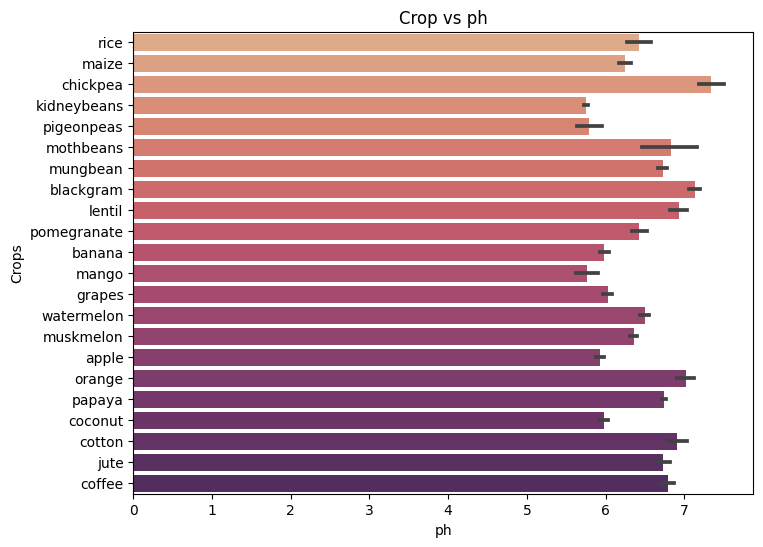

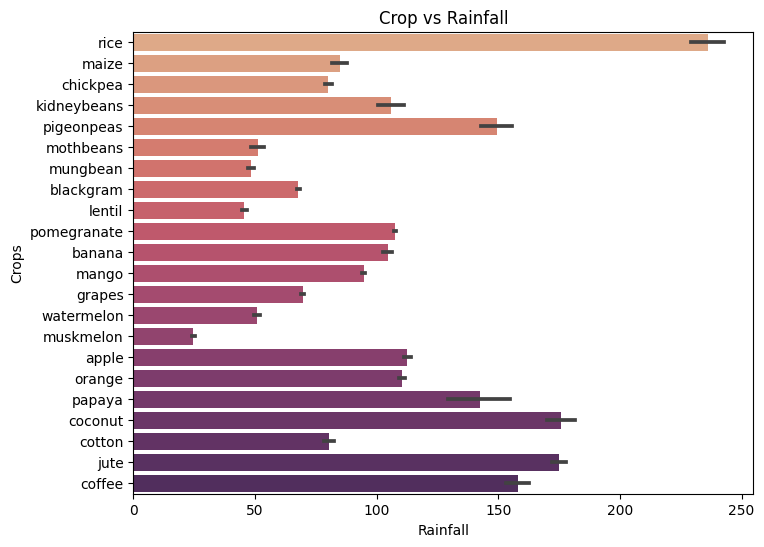

In [83]:
for i in X.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=X[i], y=df['label'],palette="flare")
    plt.title(f'Crop vs {i}')
    plt.ylabel('Crops')
    plt.show()

<Figure size 1000x800 with 0 Axes>

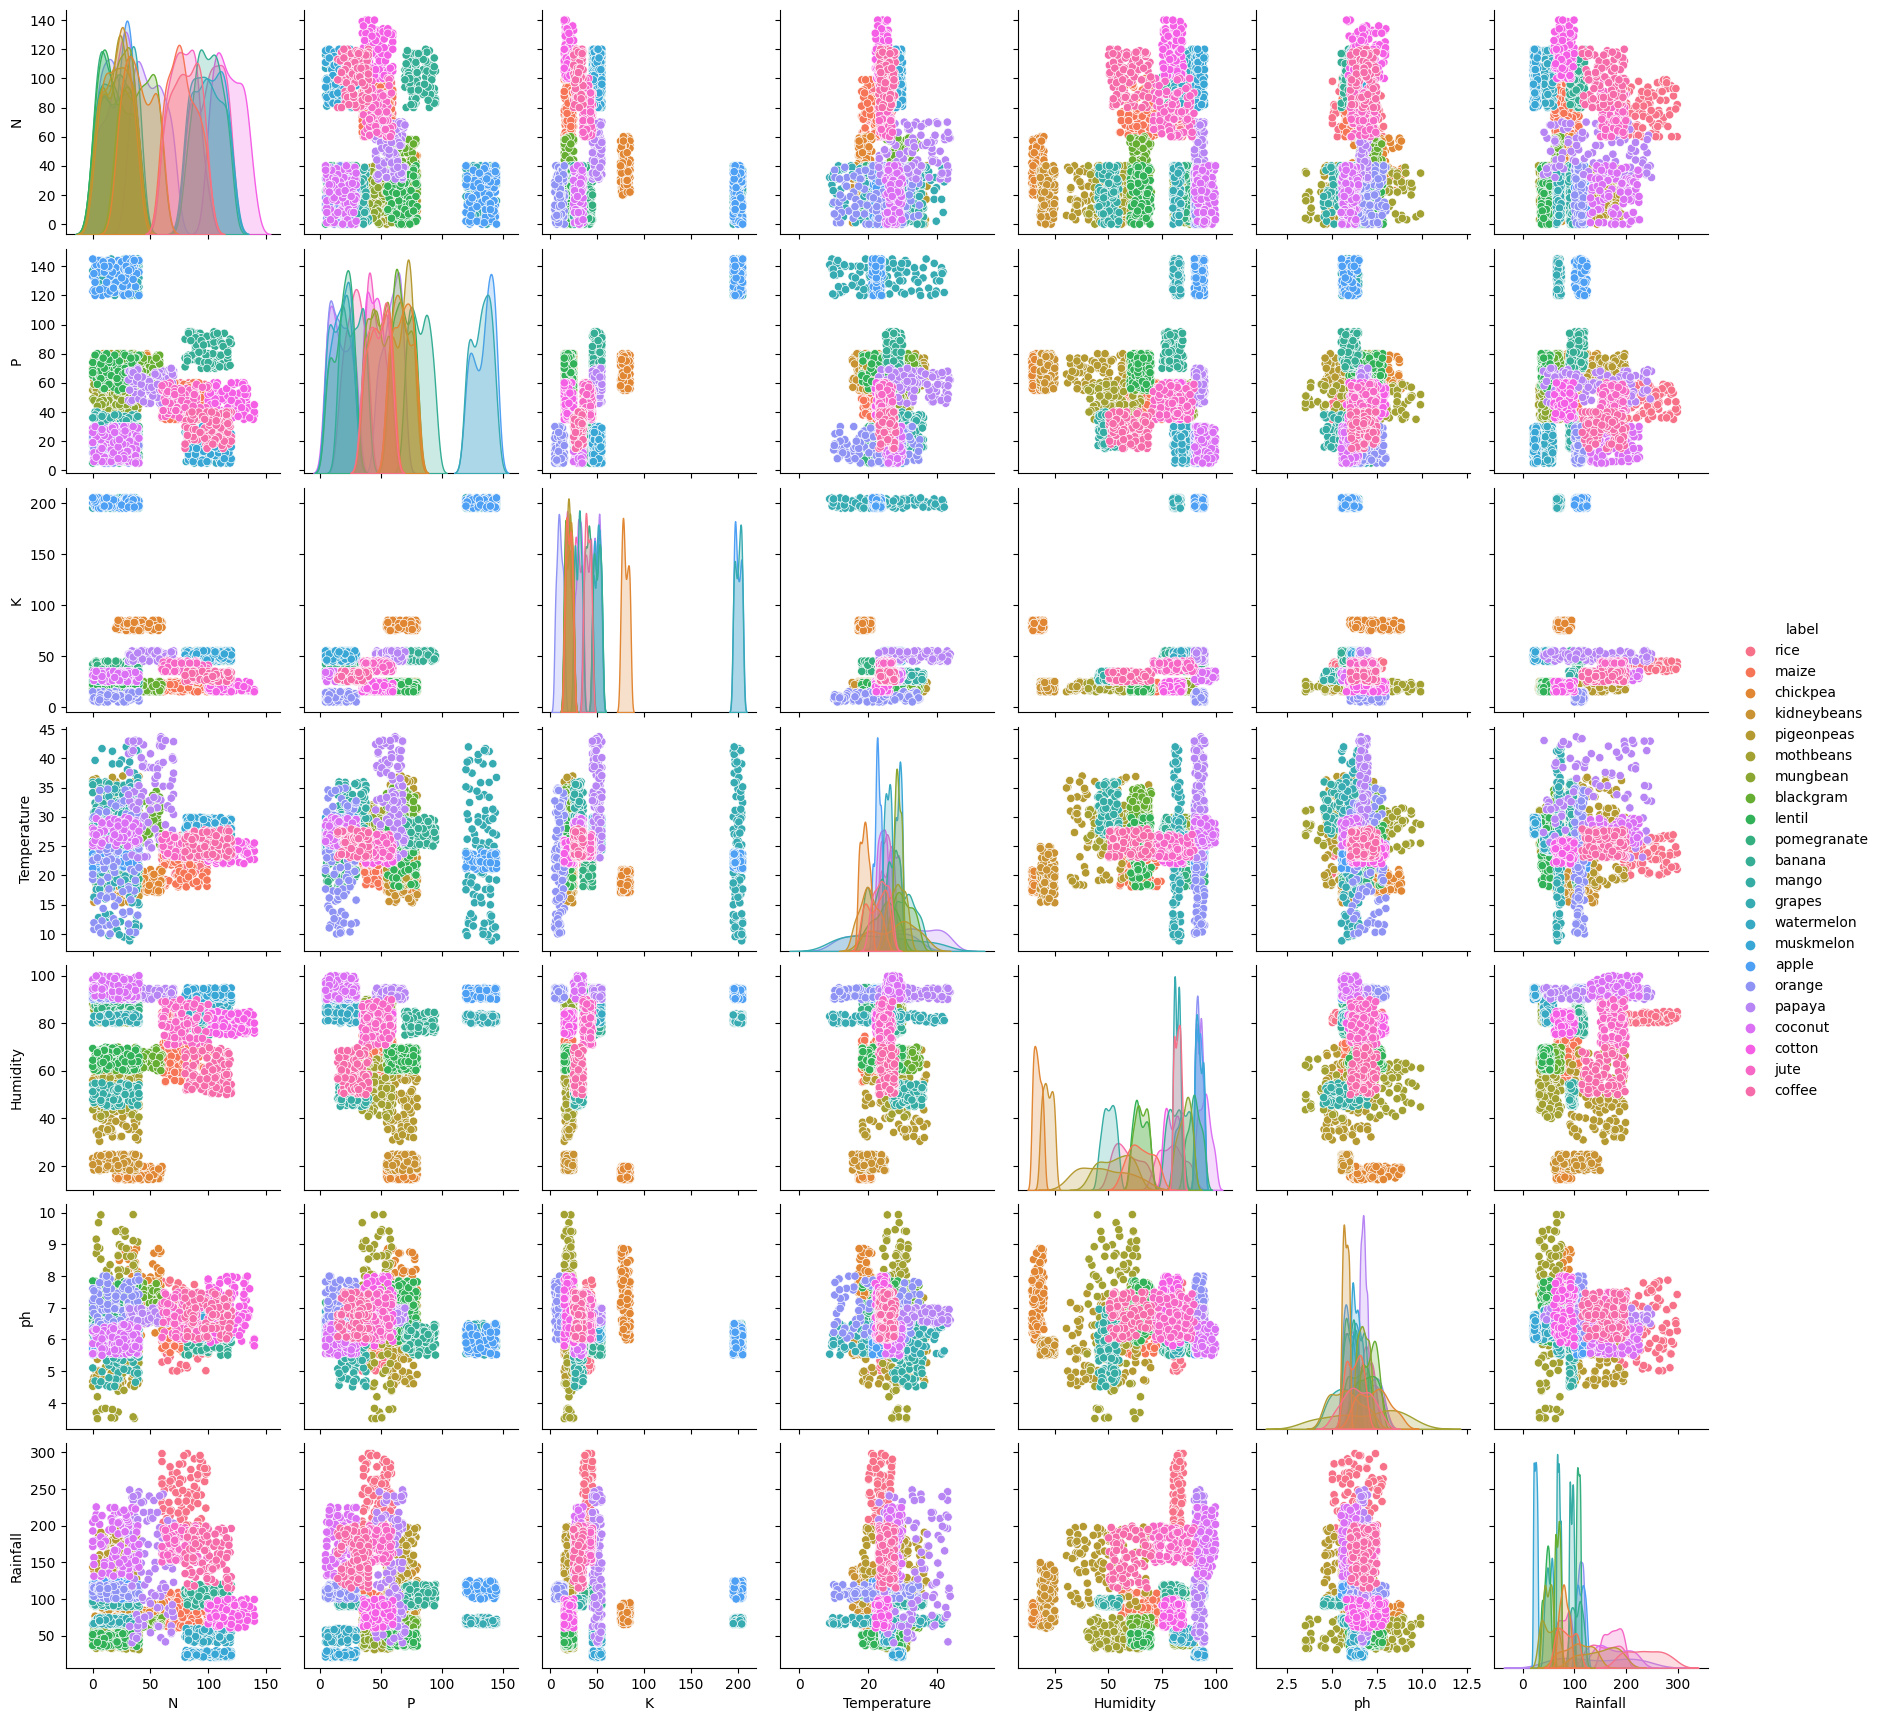

In [84]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='label')
plt.show()

Text(0.5, 1.0, 'Top 5 Crops with Highest Nitrogen Requirements (Pie Chart)')

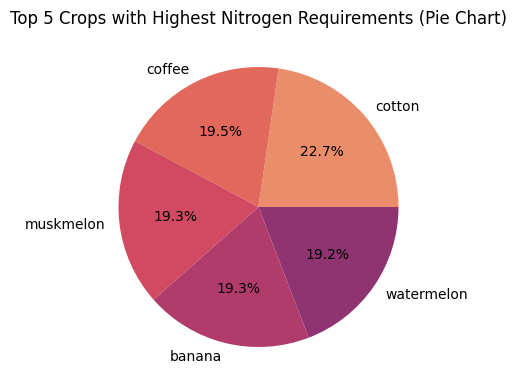

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

nitrogen_by_crop = df.groupby('label')['N'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(nitrogen_by_crop.values, labels=nitrogen_by_crop.index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest Nitrogen Requirements (Pie Chart)')

Text(0.5, 1.0, 'Top 5 Crops with Highest Phosphorus Requirements (Pie Chart)')

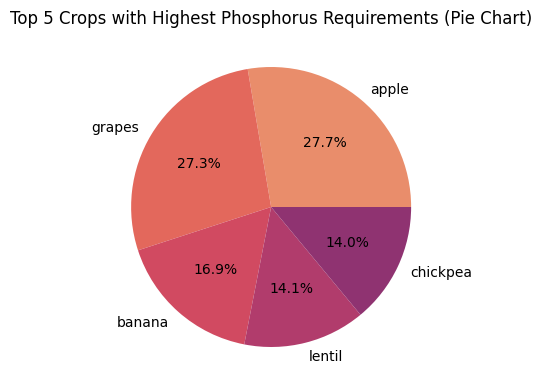

In [86]:
phosphorus_by_crop = df.groupby('label')['P'].mean().sort_values(ascending=False).head(5)



# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(phosphorus_by_crop, labels=phosphorus_by_crop.index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest Phosphorus Requirements (Pie Chart)')

Text(0.5, 1.0, 'Top 5 Crops with Highest Potassium Requirements (Pie Chart)')

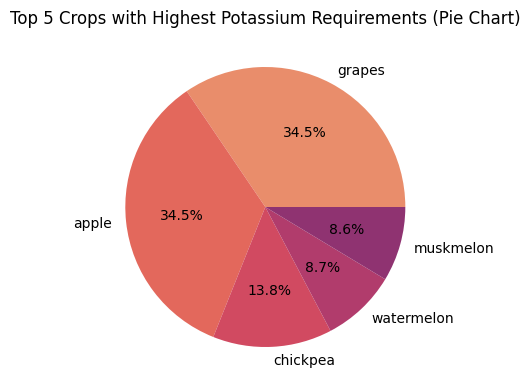

In [87]:
potassium_by_crop = df.groupby('label')['K'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(potassium_by_crop , labels=potassium_by_crop .index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest Potassium Requirements (Pie Chart)')

Text(0.5, 1.0, 'Top 5 Crops with Highest Temperature Requirements (Pie Chart)')

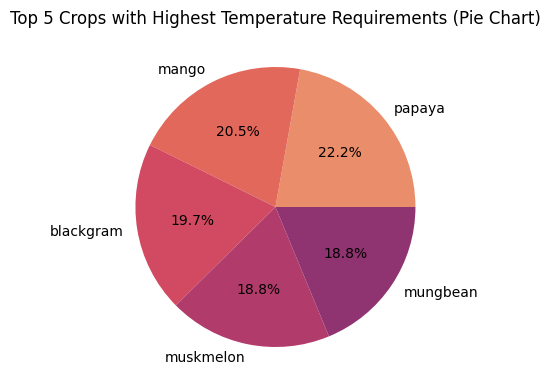

In [88]:
Temperature_by_crop = df.groupby('label')['Temperature'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(Temperature_by_crop , labels=Temperature_by_crop .index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest Temperature Requirements (Pie Chart)')



Text(0.5, 1.0, 'Top 5 Crops with Highest Rainfall Requirements (Pie Chart)')

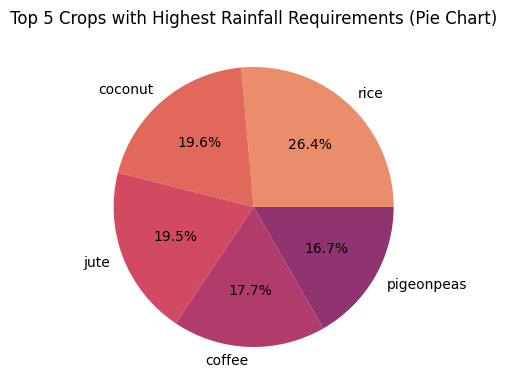

In [89]:
rainfall_by_crop = df.groupby('label')['Rainfall'].mean().sort_values(ascending=False).head(5)



# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(rainfall_by_crop, labels=rainfall_by_crop.index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest Rainfall Requirements (Pie Chart)')



Text(0.5, 1.0, 'Top 5 Crops with Highest ph Requirements (Pie Chart)')

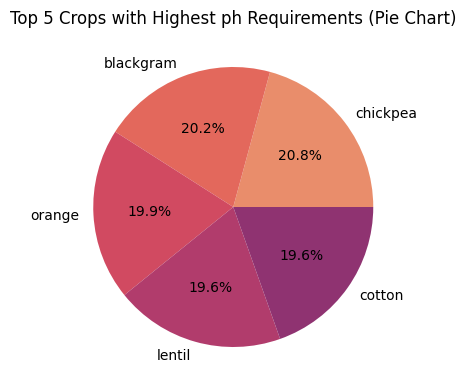

In [90]:
ph_by_crop = df.groupby('label')['ph'].mean().sort_values(ascending=False).head(5)
# Plotting
plt.figure(figsize=(15, 10))


# Pie Chart
plt.subplot(2, 2, 3)
plt.pie(ph_by_crop, labels=ph_by_crop.index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Top 5 Crops with Highest ph Requirements (Pie Chart)')

                                                                                
                                                                                

# Label Encoding

In [91]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [92]:
labels={
    'rice':0,
    'maize':1,
    'jute':2,
    'cotton':3,
    'coconut':4,
    'papaya':5,
    'orange':6,
    'apple':7,
    'muskmelon':8,
    'watermelon':9,
    'grapes':10,
    'mango':11,
    'banana':12,
    'pomegranate':13,
    'lentil':14,
    'blackgram':15,
    'mungbean':16,
    'mothbeans':17,
    'pigeonpeas':18,
    'kidneybeans':19,
    'chickpea':20,
    'coffee':21
    
}
df['label']=df['label'].map(labels)

In [93]:
df['label'].value_counts()

label
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

In [94]:
df.sample(20)

,N,P,K,Temperature,Humidity,ph,Rainfall,label
762,28,65,23,28.386865,61.888711,7.405176,74.244591,15
715,36,66,15,30.085454,69.348120,6.668239,67.136744,15
248,57,60,84,19.103428,17.261845,6.586777,75.491012,20
305,26,65,22,17.848066,18.776220,5.949949,143.098417,19
2135,88,35,35,27.559065,58.457429,6.784461,117.938999,21
1259,17,136,195,41.207336,81.610510,6.389783,65.902275,10
722,52,71,16,27.742748,68.539971,7.075886,71.786153,15
2172,111,29,31,26.059684,52.310985,6.136287,161.343254,21
448,5,62,23,27.934828,66.454571,4.722222,145.372880,18
629,23,59,25,27.826262,88.731002,6.320768,56.688338,16


# Train and Split

In [96]:
X=df.drop(columns=['label'])
Y=df['label']

In [97]:
X.shape

(2200, 7)

In [98]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20)

In [100]:
train_x.shape

(1760, 7)

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [102]:
reg=LogisticRegression()

In [103]:
reg.fit(train_x,train_y)
y_pred=reg.predict(test_x)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
reg.score(test_x,test_y)

0.9477272727272728

In [105]:
accuracy_score(test_y,y_pred)

0.9477272727272728

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knc=KNeighborsClassifier()

In [108]:
knc.fit(train_x,train_y)
y_pred=knc.predict(test_x)

In [109]:
knc.score(test_x,test_y)

0.975

In [110]:
accuracy_score(test_y,y_pred)

0.975

In [111]:
train_x

,N,P,K,Temperature,Humidity,ph,Rainfall
5,69,37,42,23.058049,83.370118,7.073454,251.055000
1938,111,53,19,23.964360,78.027631,6.419537,84.631489
490,23,55,16,21.011424,69.691413,5.111489,185.203911
432,27,61,18,33.307118,67.077808,5.266227,108.509017
1937,111,41,18,23.643284,78.125867,6.105398,80.961573
...,...,...,...,...,...,...,...
1285,6,128,200,25.963084,82.578136,5.838748,70.317826
2161,87,28,35,26.560278,57.162181,6.759212,152.061623
484,22,62,16,34.645541,54.323425,4.828936,180.901000
972,18,21,35,23.280123,94.943305,6.368561,111.138210


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc=RandomForestClassifier()

In [114]:
rfc.fit(train_x,train_y)
y_pred=rfc.predict(test_x)

In [115]:
rfc.score(test_x,test_y)

0.9954545454545455

In [116]:
accuracy_score(test_y,y_pred)

0.9954545454545455

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains features and y contains target labels (crop types)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9931818181818182


In [118]:
# Access feature importance
feature_importance = rf_classifier.feature_importances_

In [119]:
 feature_importance

array([0.10725534, 0.14930658, 0.17978888, 0.07011314, 0.2224541 ,
       0.0471353 , 0.22394666])

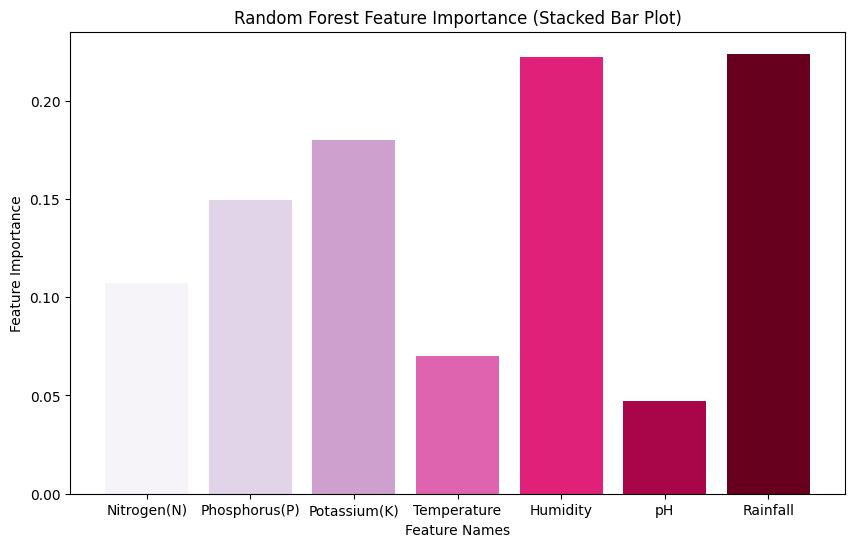

In [120]:
# Assuming rf_classifier is your trained Random Forest classifier

# Get feature importances
feature_importance = rf_classifier.feature_importances_

# Get the names of features (assuming you have them in a list called 'feature_names')
feature_names = ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)','Temperature','Humidity','pH','Rainfall']
colors = plt.cm.PuRd(np.linspace(0, 1, len(feature_names)))

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance, color=colors)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance (Stacked Bar Plot)')
plt.show()


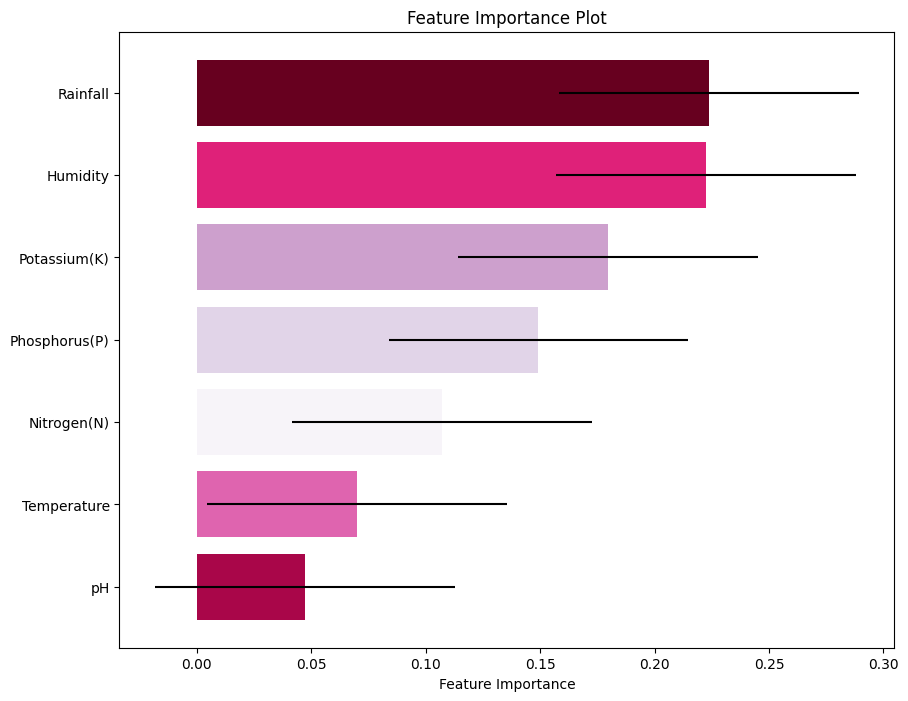

In [121]:
# Assuming feature_importance and feature_names are defined

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Adjust figure size
plt.figure(figsize=(10, 8))

# Create a bar plot with sorted features, colored by importance
colors = plt.cm.PuRd(np.linspace(0, 1, len(feature_names)))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], color=colors[sorted_idx], xerr=np.std(feature_importance[sorted_idx]))

# Set y-axis ticks and labels
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx])

# Set labels and title
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')

# Show the plot
plt.show()

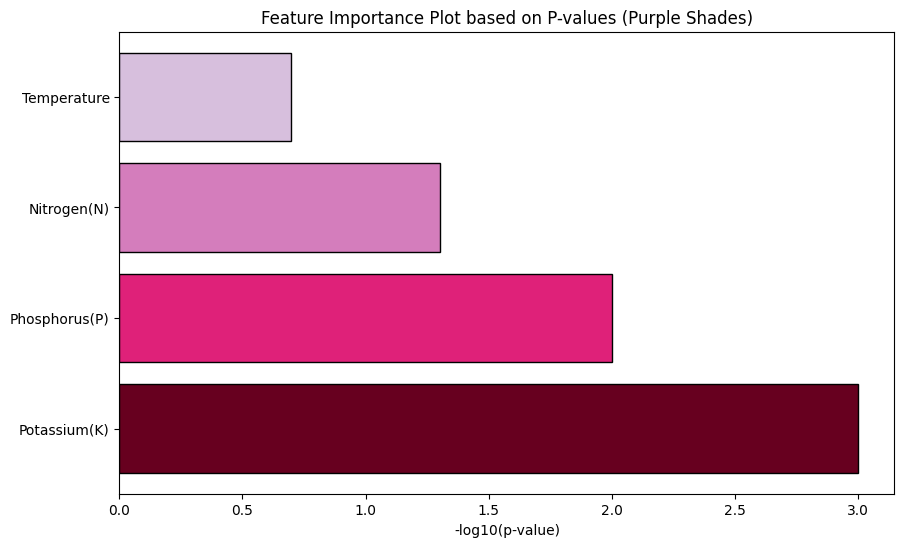

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p_values and feature_names are defined
p_values = np.array([0.05, 0.01, 0.001, 0.2])  # Replace with your actual p-values
feature_names = ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)', 'Temperature', 'Humidity', 'pH', 'Rainfall']

# Sort features by p-values
sorted_idx = np.argsort(p_values)

# Create a bar plot with sorted features, colored by negative logarithm of p-values using purple shades
colors = plt.cm.PuRd(-np.log10(p_values[sorted_idx]) / np.max(-np.log10(p_values[sorted_idx])))
plt.figure(figsize=(10, 6))
plt.barh(range(len(p_values)), -np.log10(p_values[sorted_idx]), color=colors, edgecolor='black')

# Set y-axis ticks and labels
plt.yticks(range(len(p_values)), np.array(feature_names)[sorted_idx])

# Set labels and title
plt.xlabel('-log10(p-value)')
plt.title('Feature Importance Plot based on P-values (Purple Shades)')

# Show the plot
plt.show()



In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
nb=GaussianNB()

In [125]:
nb.fit(train_x,train_y)
y_pred=nb.predict(test_x)

In [126]:
nb.score(test_x,test_y)

0.9954545454545455

In [127]:
accuracy_score(test_y,y_pred)

0.9954545454545455

In [128]:
from sklearn.svm import SVC

In [129]:
svc = SVC()  
svc.fit(train_x, train_y)  
y_pred = svc.predict(test_x)

In [130]:
svc.score(test_x,test_y)

0.9704545454545455

In [131]:
accuracy_score(test_y,y_pred)

0.9704545454545455

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc_pred=dtc.predict(test_x)

In [134]:
dtc.score(test_x,test_y)

0.9772727272727273

In [135]:
accuracy_score(test_y,dtc_pred)

0.9772727272727273

In [136]:
#create instances of all models
models={
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Naive Byes':GaussianNB(),
    'Support Vector Classifier':SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier()    
}
for name,mod in models.items():
    mod.fit(train_x,train_y)
    y_pred=mod.predict(test_x)
    print(f"{name} with accuracy of {accuracy_score(test_y,y_pred)}")

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with accuracy of 0.9477272727272728
KNN Classifier with accuracy of 0.975
Random Forest Classifier with accuracy of 0.9954545454545455
Naive Byes with accuracy of 0.9954545454545455
Support Vector Classifier with accuracy of 0.9704545454545455
Decision Tree Classifier with accuracy of 0.9681818181818181


In [137]:
rc=RandomForestClassifier()
rc.fit(train_x,train_y)
y_pred=rc.predict(test_x)

In [138]:
rc.score(test_x,test_y)

0.9954545454545455

In [139]:
accuracy_score(test_y,y_pred)

0.9954545454545455

In [140]:
from sklearn.metrics import confusion_matrix

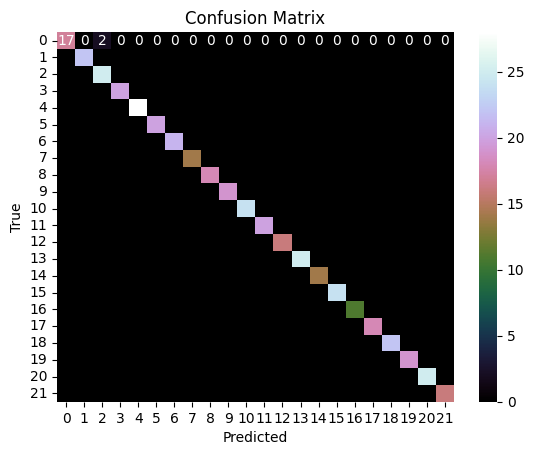

In [141]:
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True,cmap="cubehelix") 
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.show()

In [142]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_pred=dt.predict(test_x)

In [143]:
dt.score(test_x,test_y)

0.975

In [144]:
accuracy_score(test_y,dt_pred)

0.975

In [145]:
def recommendation(N,P,K,Temp,Hum,ph,Rain):
    features=pd.DataFrame([[N,P,K,Temp,Hum,ph,Rain]],columns=['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall'])
    prediction=rfc.predict(features)
    return prediction[0]

In [146]:
N=51
P=48
K=28
Temp=19.201294
Hum=68.305790
ph=6.112751
Rain=87.850924
predict=recommendation(N,P,K,Temp,Hum,ph,Rain)

crop={
    'rice':0,
    'maize':1,
    'jute':2,
    'cotton':3,
    'coconut':4,
    'papaya':5,
    'orange':6,
    'apple':7,
    'muskmelon':8,
    'watermelon':9,
    'grapes':10,
    'mango':11,
    'banana':12,
    'pomegranate':13,
    'lentil':14,
    'blackgram':15,
    'mungbean':16,
    'mothbeans':17,
    'pigeonpeas':18,
    'kidneybeans':19,
    'chickpea':20,
    'coffee':21
    
}

for key, value in crop.items():
        if (value==predict):
            print(f"{key} crop should be cultivated")
predict

mango crop should be cultivated


11

In [148]:
import pickle

In [149]:
pickle.dump(rfc,open('rfc.pkl','wb'))

In [150]:
pickle.dump(dt,open('model2.pkl','wb'))

In [151]:
import sklearn
print(sklearn.__version__)


1.4.0


In [152]:
import sklearn
print(sklearn.__version__)

1.4.0
